# __Pandas Best Practices__

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
ri= pd.read_csv('police.csv')
#ted = pd.read_csv('ted.csv')
#ri.driver_age.plot()


## __Dataset 1: Stanford Open Policing Project__

In [43]:
ri

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [11]:
ri.shape

(91741, 15)

In [12]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [17]:
ri.isnull()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91737,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91738,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91739,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


In [18]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [116]:
ri.drop('county_name', axis='columns', inplace=True)

## __2. Do Men or Women Speed More Often__
###  __driver_gender, violation__

In [1]:
ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize=True)
# Pull violations for speeding, then decipher male/female. (normalize=True) to get % instead of number

NameError: name 'ri' is not defined

In [36]:
ri[ri.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [53]:
ri[ri.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [54]:
ri.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [41]:
ri[ri.is_arrested == True].driver_gender.value_counts(normalize=True)

M    0.796518
F    0.203482
Name: driver_gender, dtype: float64

In [50]:
ri[ri.driver_race == 'Black'].drugs_related_stop.value_counts()

False    12043
True       201
Name: drugs_related_stop, dtype: int64

In [48]:
ri.loc[:, 'driver_race'].value_counts()

White       62158
Black       12244
Hispanic     9507
Asian        2259
Other         240
Name: driver_race, dtype: int64

In [52]:
ri[ri.drugs_related_stop == True].driver_race.value_counts(normalize=True)

White       0.584049
Black       0.246626
Hispanic    0.154601
Asian       0.013497
Other       0.001227
Name: driver_race, dtype: float64

In [55]:
ri.groupby('driver_race').violation.value_counts(normalize=True)

driver_race  violation          
Asian        Speeding               0.675520
             Moving violation       0.147853
             Equipment              0.088977
             Other                  0.036299
             Registration/plates    0.025675
             Seat belt              0.025675
Black        Speeding               0.411467
             Moving violation       0.235462
             Equipment              0.179843
             Other                  0.072444
             Registration/plates    0.064031
             Seat belt              0.036753
Hispanic     Speeding               0.325339
             Moving violation       0.253287
             Equipment              0.225728
             Registration/plates    0.075313
             Other                  0.062375
             Seat belt              0.057957
Other        Speeding               0.612500
             Moving violation       0.216667
             Other                  0.087500
             Equipment

## __Does Race Affect Who Gets Searched?__

In [60]:
ri.groupby('search_conducted').driver_race.value_counts(normalize=True).unstack()

driver_race,Asian,Black,Hispanic,Other,White
search_conducted,,,,,
False,0.026535,0.137648,0.107232,0.002848,0.725737
True,0.015957,0.247184,0.182728,0.000939,0.553191


## __Does Gender Affect Who Gets Searched?__

In [61]:
ri.groupby('search_conducted').driver_gender.value_counts(normalize=True)

search_conducted  driver_gender
False             M                0.723110
                  F                0.276890
True              M                0.852628
                  F                0.147372
Name: driver_gender, dtype: float64

In [62]:
ri.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [63]:
ri.search_conducted.mean()

0.03483720473942948

In [64]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [67]:
ri.groupby('driver_race').search_conducted.mean()

driver_race
Asian       0.022576
Black       0.064521
Hispanic    0.061428
Other       0.012500
White       0.028444
Name: search_conducted, dtype: float64

In [68]:
#groupby() can have multiple items/values. Make a list of strings for the values you want
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

## __Why is search_type Missing So Often?__

In [69]:
# How many rows of missing data in each column
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [73]:
ri.search_type.value_counts(dropna=0)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Protective

## __During a Search, How Often Driver Frisk?__

In [117]:
# Search for a value with in a column. This is for frisks. Could also do M/F or age or county etc..
ri.search_type.str.contains('Protective Frisk')

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
91736    NaN
91737    NaN
91738    NaN
91739    NaN
91740    NaN
Name: search_type, Length: 91741, dtype: object

In [118]:
# Create a new column called frisk
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [119]:
ri.frisk.value_counts(dropna=0)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [120]:
ri.frisk.value_counts(normalize=True)

False    0.914268
True     0.085732
Name: frisk, dtype: float64

In [121]:
ri.frisk.sum()

274

In [122]:
ri.frisk.mean()

0.08573216520650813

In [123]:
ri.stop_date.str.slice(0, 4).min()

'2005'

In [124]:
ri.stop_date.str.slice(0, 4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [125]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [126]:
# Concatonate 2 strings together
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

In [127]:
# Output from previous code
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
               ...       
91736    2015-12-31 20:27
91737    2015-12-31 20:35
91738    2015-12-31 20:45
91739    2015-12-31 21:42
91740    2015-12-31 22:46
Name: stop_date, Length: 91741, dtype: object

In [128]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [129]:
# Output showing 'stop_datetime' is a new column with data type datetime64
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

## __Which Year Had The Least Number Of Stops?__

In [130]:
ri.stop_date.str.slice(0, 4).min()

'2005'

## __How Does Drug Activity Change By TIme of Day?__
### __stop_datetime, drugs_related_stop__

In [131]:
#ri.groupby(['violation', 'driver_gender']).search_conducted.mean()
ri.groupby('drugs_related_stop').stop_datetime.value_counts()

drugs_related_stop  stop_datetime      
False               2013-01-22 22:10:00    21
                    2015-01-10 09:11:00    12
                    2012-07-15 09:34:00     6
                    2007-03-23 09:45:00     5
                    2012-07-21 10:45:00     5
                                           ..
True                2015-12-03 14:48:00     1
                    2015-12-06 10:33:00     1
                    2015-12-07 14:10:00     1
                    2015-12-28 11:05:00     1
                    2015-12-30 08:51:00     1
Name: stop_datetime, Length: 88691, dtype: int64

In [132]:
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [133]:
ri.groupby('drugs_related_stop').stop_time.value_counts()

drugs_related_stop  stop_time
False               11:00        322
                    10:00        316
                    09:00        290
                    09:30        289
                    10:30        284
                                ... 
True                23:37          1
                    23:41          1
                    23:52          1
                    23:55          1
                    23:57          1
Name: stop_time, Length: 1985, dtype: int64

In [134]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.value_counts()

stop_datetime  drugs_related_stop
0              False                 5118
               True                   103
1              False                 4382
               True                    60
2              False                 2929
               True                    46
3              False                 1152
               True                    20
4              False                  251
               True                     3
5              False                  209
               True                     1
6              False                 3280
               True                    10
7              False                 4557
               True                    15
8              False                 5196
               True                    14
9              False                 6795
               True                    43
10             False                 7308
               True                    42
11             False                 5836


In [135]:
ri.drugs_related_stop.mean()

0.008883705213590434

In [136]:
ri

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:27:00
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:35:00
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:45:00
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2015-12-31 21:42:00


<AxesSubplot:xlabel='stop_datetime'>

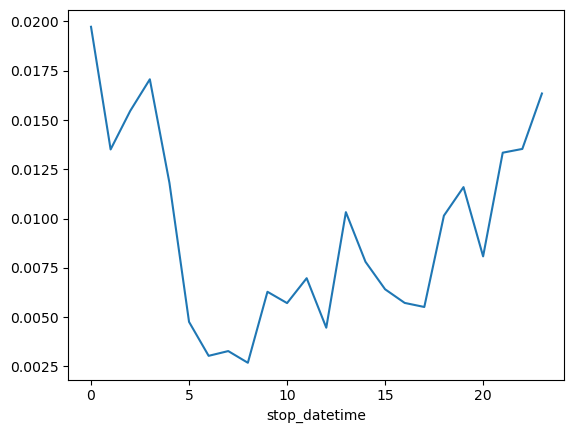

In [137]:
# Default plot for pandas is line plot
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

## __Do Most Stops Occur At Night?__

<AxesSubplot:>

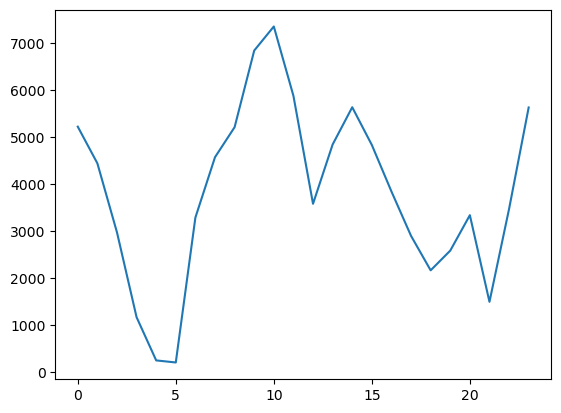

In [138]:
# Be conscious of sorting when plotting
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()
# sort_values = sorts values on right / sort_index = sorts values on left

## __Find The Bad Data In The stop_duration Column and Fix It__

In [163]:
ri.stop_duration.value_counts(normalize=1)

0-15 Min     0.836074
16-30 Min    0.163926
Name: stop_duration, dtype: float64

In [140]:
ri.stop_duration.value_counts(dropna=0)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [167]:
ri.loc[ (ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [168]:
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
Name: stop_duration, dtype: int64

In [169]:
import numpy as np

In [157]:
# Adds 1 and 2 rows to NaN
#ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.nan
#ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.30+min

In [146]:
ri.stop_duration.value_counts(dropna=0)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [162]:
#ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.30+min